In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
from kernels import *
import seaborn as sn 
from utils import *
import kernels
from training import *
from search import *

In [2]:
X = np.linspace(0,100,100).reshape(-1, 1)
X = tf.Variable(X)

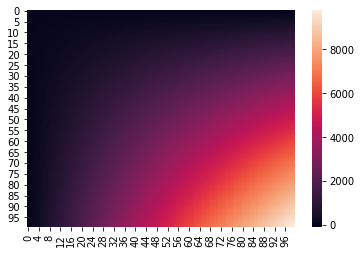

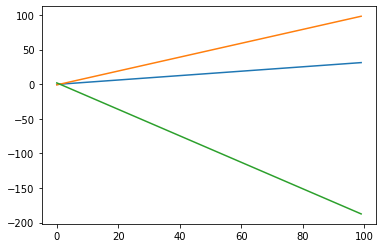

In [3]:
cov = LIN(X,X,[1,1,1]).numpy()
sn.heatmap(cov)
plt.plot
plt.show()
MEANS = []
for i in range(3) :
    mean,_,_=get_values(np.zeros((cov.shape[0])),cov,nb_samples=1)
    MEANS.append(mean)
for i in range(len(MEANS)) :
    plt.plot(MEANS[i])
plt.show()

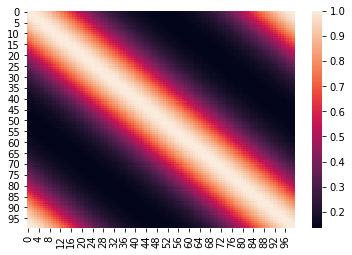

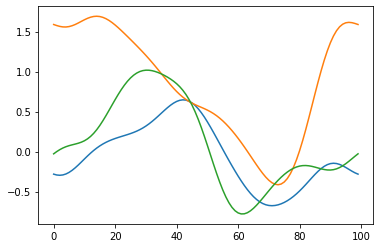

In [4]:
cov = PER(X,X,[1,1,1]).numpy()
sn.heatmap(cov)
plt.plot
plt.show()
MEANS = []
for i in range(3) :
    mean,_,_=get_values(np.zeros((cov.shape[0])),cov,nb_samples=1)
    MEANS.append(mean)
for i in range(len(MEANS)) :
    plt.plot(MEANS[i])
plt.show()

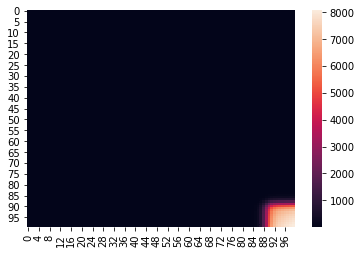

In [4]:
X = np.linspace(0,100,100).reshape(-1, 1)
cov = CP(X,X,[90,1.1],kernels.PER,kernels.LIN,[1,10,1],[10,1,1])
sn.heatmap(cov)
plt.plot
plt.show()

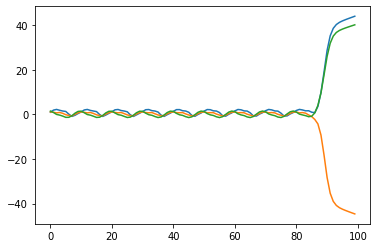

In [5]:
MEANS = []
for i in range(3) :
    mean,_,_=get_values(np.zeros((cov.shape[0])),cov,nb_samples=1)
    MEANS.append(mean)
for i in range(len(MEANS)) :
    plt.plot(MEANS[i])
plt.show()

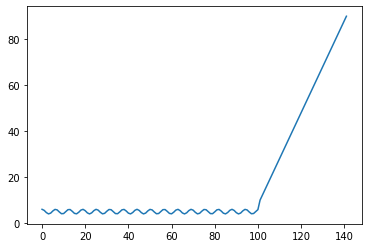

In [6]:
Y = np.append(5+np.cos(np.linspace(0, 100, 101)),2*np.linspace(5, 45, 41)).reshape(-1, 1)
plt.plot(Y)
plt.show()
X_s = np.linspace(0,len(Y)+50,len(Y)+50).reshape(-1, 1)
X = np.linspace(0,len(Y),len(Y)).reshape(-1,1)

In [8]:
t0 = time.time()
model,kernel= launch_analysis(X,Y,X_s,straigth=True,do_plot=True,depth=1,verbose=True,initialisation_restart=10,reduce_data=False,experimental_multiprocessing=False,GPY=False) #straight parameters == True
print('time took: {} seconds'.format(time.time()-t0))

You chooosed straightforward training
[('+LIN',), ('+SE',), ('+PER',), ("CP('LIN', 'SE')",), ("CP('LIN', 'PER')",), ("CP('SE', 'LIN')",), ("CP('SE', 'PER')",), ("CP('PER', 'LIN')",), ("CP('PER', 'SE')",)]
tf.Tensor([84.96179518 63.23543297 78.20589338], shape=(3,), dtype=float64)
tf.Tensor([[-600.90371849]], shape=(1, 1), dtype=float64)
tf.Tensor([43.04094286 89.96270792 27.06907608], shape=(3,), dtype=float64)
tf.Tensor([[-600.90371847]], shape=(1, 1), dtype=float64)
tf.Tensor([ 6.21398904 86.94919484 92.12958377], shape=(3,), dtype=float64)
tf.Tensor([[-600.90371847]], shape=(1, 1), dtype=float64)
tf.Tensor([82.1216044  27.82497279 98.94868184], shape=(3,), dtype=float64)
tf.Tensor([[-600.90371847]], shape=(1, 1), dtype=float64)
tf.Tensor([88.54616049 47.29249962 85.32624313], shape=(3,), dtype=float64)
tf.Tensor([[-600.90371847]], shape=(1, 1), dtype=float64)
tf.Tensor([89.70478022 69.54440603 87.30432717], shape=(3,), dtype=float64)
tf.Tensor([[-600.90371847]], shape=(1, 1), dtype=

tf.Tensor([[-432.50841493]], shape=(1, 1), dtype=float64)
tf.Tensor(
[  4.04975697 559.18921784  77.16552403  27.05197843   3.5688734
  66.4336029 ], shape=(6,), dtype=float64)
tf.Tensor([[inf]], shape=(1, 1), dtype=float64)
tf.Tensor(
[  4.04975697 559.18921784  77.16552403  27.05197843   3.5688734
  26.80134529], shape=(6,), dtype=float64)
tf.Tensor([[inf]], shape=(1, 1), dtype=float64)
tf.Tensor(
[  4.04975697 559.18921784  77.16552403  27.05197843   3.5688734
  37.29668885], shape=(6,), dtype=float64)
tf.Tensor([[inf]], shape=(1, 1), dtype=float64)
tf.Tensor(
[  4.04975697 559.18921784  77.16552403  27.05197843   3.5688734
  99.86467722], shape=(6,), dtype=float64)
tf.Tensor([[inf]], shape=(1, 1), dtype=float64)
tf.Tensor(
[  4.04975697 559.18921784  77.16552403  27.05197843   3.5688734
  78.12433692], shape=(6,), dtype=float64)
tf.Tensor([[inf]], shape=(1, 1), dtype=float64)
tf.Tensor(
[  4.04975697 559.18921784  77.16552403  27.05197843   3.5688734
  11.86268679], shape=(6,), dty

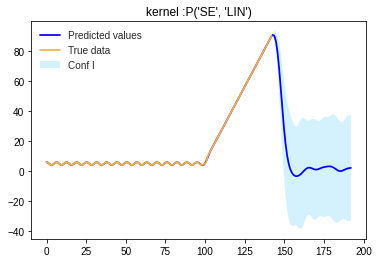

In [8]:
mu,cov = model.predict(X,Y,X_s,kernel)
model.plot(mu,cov,X,Y,X_s,kernel)
plt.show()

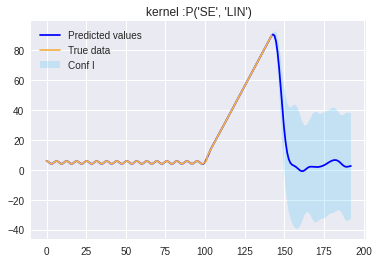

In [9]:
%matplotlib inline
mu,cov = model.predict(X,Y,X_s,kernel)
model.plot(mu,cov,X,Y,X_s,kernel)
plt.show()